In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Ask the user to supply the mean and standard deviation of a 1D Gaussian (+seed)

In [2]:
mu = 3
sig = 1.2
seed = 1000
np.random.seed(seed)

### Define Gaussian function

In [3]:
def gaussian(x, mu, sig):
    return np.exp(-np.power((x - mu)/sig, 2.)/2)/(sig*np.sqrt(2*np.pi))

### For the given mean and std, draw 1,000,000 random samples from the 1D Gaussian 

In [4]:
samples = np.random.normal(mu,sig, 1000000);

### Build a dataset 𝒟 with 1,000 histogram bins 

In [5]:
hist = np.histogram(samples,bins = 1000)
width = hist[1][1:1001]-hist[1][0:1000]
data = list(zip((hist[1][1:1001]+hist[1][0:1000])/2, hist[0]/hist[0].sum()/width))
np.random.shuffle(data)
data_x, data_y = zip(*data)

### Split the dataset into train (90%) and test (10%): 𝒟={𝒟_𝑡𝑟𝑎𝑖𝑛,𝒟_𝑡𝑒𝑠𝑡 }. Make sure both train and test are IID.

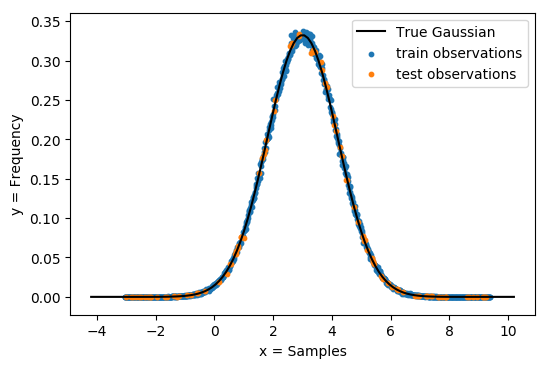

In [6]:
train = (data_x[0:900],data_y[0:900])
test = (data_x[900:1000],data_y[900:1000])

plt.rcParams['figure.dpi'] = 100
plt.scatter(train[0],train[1], label= "train observations", s = 10)
plt.scatter(test[0],test[1], label= "test observations", s = 10)
x_values = np.linspace(-6*sig+mu, 6*sig+mu, 120)
plt.plot(x_values, gaussian(x_values, mu, sig), color = "black", label = "True Gaussian")
plt.xlabel('x = Samples')
plt.ylabel('y = Frequency')
plt.legend()
plt.show()

### Using pure Python3 and Numpy, build a 3-layer neural networks: 
### Initialize the weights using a Gaussian distribution with zero mean and std=0.1 (line 12)

In [7]:
class Inp:
    def __init__(self,x):
        self.a = np.array([x])[:,np.newaxis]
    def calc(self):
        return self.a
    def bp(self,val,lr):
        pass
        
class Layer:
    def __init__(self,prev,size):
        self.prev = prev
        self.w = np.random.normal(0,0.1,(size,prev.a.shape[0]))
        self.b = np.zeros((size,1))
        self.a = np.matmul(self.w,prev.a)+self.b
    def calc(self):
        self.a = np.matmul(self.w,self.prev.calc())+self.b
        return self.a
    def bp(self,val,lr):
        nval = np.matmul(val,self.w)
        self.w -= lr*np.matmul(self.prev.a,val).T
        self.b -= lr*val.T
        self.prev.bp(nval,lr)

class Relu:
    def __init__(self,prev):
        self.prev = prev
        self.a = prev.a*(prev.a>0)
    def calc(self):
        self.prev.a = self.prev.calc()
        self.a = self.prev.a*(self.prev.a>0)
        return self.a
    def bp(self,val,lr):
        nval = (self.prev.a>0).T*val
        self.prev.bp(nval,lr)
        
class Sigmoid:
    def __init__(self,prev):
        self.prev = prev
        self.a = 1 / (1 + np.exp(-prev.a))
    def calc(self):
        self.a = 1 / (1 + np.exp(-self.prev.calc()))
        return self.a
    def bp(self,val,lr):
        nval = (self.a*(1-self.a)).T*val
        self.prev.bp(nval,lr)

### Layers: {1−64−𝑅𝑒𝐿𝑈−64−𝑅𝑒𝐿𝑈−64−1−𝑠𝑖𝑔𝑚𝑜𝑖𝑑}

In [8]:
x = Inp(train[0][0])
l1 = Layer(x,64)
l1r = Relu(l1)
l2 = Layer(l1r,64)
l2r = Relu(l2)
l3 = Layer(l2r,64)
l4 = Layer(l3,1) 
l5 = Sigmoid(l4)

### Using pure Python3 and Numpy, implement the backpropagation discussed in this class. Learning rate=0.1. Batch size =1. Loss=MSE.

In [9]:
class MSE:
    def __init__(self,prev,y,lr):
        self.prev = prev
        self.y = y
        self.lr = lr
    def bp(self):
        val = 2*(self.prev.a.T-self.y)
        self.prev.bp(val,self.lr)
        self.prev.calc()

In [10]:
loss = MSE(l5,train[1][0],0.1)

### Train for 20 epochs

In [11]:
for i in range(20):
    for i in range(900):
        x.a = np.array([train[0][i]])[:,np.newaxis]
        loss.y = train[1][i]
        l5.calc()
        loss.bp()

### Evaluate the performance of your network

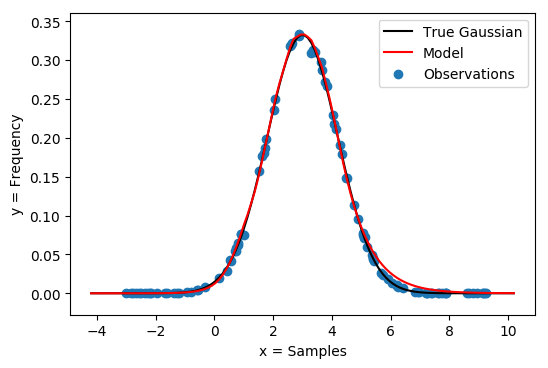

In [12]:
ans = np.zeros(x_values.size)
for i in range(x_values.size):
    x.a = np.array([x_values[i]])[:,np.newaxis]
    ans[i] = l5.calc()
plt.scatter(test[0],test[1], label = "Observations")   
plt.plot(x_values, gaussian(x_values, mu, sig), color = "black", label = "True Gaussian")
plt.plot(x_values,ans, color = "red", label = "Model")
plt.xlabel('x = Samples')
plt.ylabel('y = Frequency')
plt.legend()
plt.show()

### Test Accuracy using Test Dataset

In [13]:
test_ans = np.zeros(100)
for i in range(100):
    x.a = np.array([x_values[i]])[:,np.newaxis]
    test_ans[i] = l5.calc()
final_loss = np.power(test_ans-test[1],2).sum()/100
print(final_loss)

0.021952171391991328
